## Importing Libraries

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

## Collecting the list SP500 stock tickers that we want to pull data for

In [ ]:
# Collecting the list of SP500 stocks' list from a wikipedia page

data_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks'
data = pd.read_html(data_url)

In [ ]:
#Inlcuding 2 tables from that wikipedia page, first has the SP500 stock tickers & the second has their evolution (stocks added/removed from SP500)

data_table = data[0]
symbols_1 = data_table['Symbol'].to_list()
data_table_2 = data[1]

symbols_added = data_table_2['Added']['Ticker']
symbols_added_2 = symbols_added.to_list()

symbols_removed = data_table_2['Removed']['Ticker']
symbols_removed_2 = symbols_removed.to_list()

In [ ]:
symbols = []

# Add unique symbols from the main table
for symbol in symbols_1:
    if pd.notna(symbol) and symbol not in symbols:
        symbols.append(symbol)

# Add unique symbols from the added table
for symbol in symbols_added:
    if pd.notna(symbol) and symbol not in symbols:
        symbols.append(symbol)

# Add unique symbols from the removed table
for symbol in symbols_removed:
    if pd.notna(symbol) and symbol not in symbols:
        symbols.append(symbol)

In [ ]:
# 2 tickers names changed to match yahoo finance 'BF-B' & 'BRK-B' so we are adjusting that

symbols[symbols.index('BF.B')] = 'BF-B'
symbols[symbols.index('BRK.B')] = 'BRK-B'

In [ ]:
# Remove tickers TIE, ABK, MEE, SLR that have many short data

symbols_to_remove = {'TIE', 'ABK', 'MEE', 'SLR', 'CBE', 'CFC', 'SGP'}

symbols = [item for item in symbols if item not in symbols_to_remove]

# I- Data Collection

## Scraping Stocks' price data (Close)


In [ ]:
tickers = yf.download(symbols, start='1957-05-15', end='2024-05-15', rounding = True)['Close']
tickers

[**                     4%%                      ]  31 of 823 completed

$JOY: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[***                    6%%                      ]  52 of 823 completed

$LO: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[****                   9%%                      ]  71 of 823 completed

$NVLS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*****                 10%%                      ]  80 of 823 completed

$CFN: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*****                 10%%                      ]  82 of 823 completed

$LVLT: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*****                 11%%                      ]  88 of 823 completed

$SMS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[******                12%%                      ]  95 of 823 completed

$KFT: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)
$AV: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[******                13%%                      ]  104 of 823 completed

$RAI: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*******               14%%                      ]  112 of 823 completed

$ARG: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[********              16%%                      ]  131 of 823 completed

$DJ: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********            20%%                      ]  165 of 823 completed

$TWC: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[************          24%%                      ]  194 of 823 completed

$GENZ: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[************          25%%                      ]  203 of 823 completed

$Q: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[************          26%%                      ]  216 of 823 completed

$FDO: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[************          26%%                      ]  218 of 823 completed

$CAM: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*************         28%%                      ]  227 of 823 completed

$GGP: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**************        29%%                      ]  239 of 823 completed

$LUK: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[***************       32%%                      ]  261 of 823 completed

$SNDK: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[****************      33%%                      ]  268 of 823 completed

$ACAS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[******************    37%%                      ]  303 of 823 completed

$HCBK: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[******************    37%%                      ]  306 of 823 completed

$BXLT: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[******************    38%%                      ]  312 of 823 completed

$LLTC: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*******************   39%%                      ]  318 of 823 completed

$JOYG: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*******************   39%%                      ]  323 of 823 completed

$KRFT: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[********************  42%%                      ]  347 of 823 completed

$XTO: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[********************  42%%                      ]  349 of 823 completed

$CPGX: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[********************* 43%%                      ]  355 of 823 completed

$STJ: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[********************* 44%%                      ]  360 of 823 completed

$DPS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************47%%                      ]  384 of 823 completed

$BRCM: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)
$GMCR: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************47%%                      ]  388 of 823 completed

$MWW: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************48%%                      ]  395 of 823 completed

$FRE: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************51%%                      ]  422 of 823 completed

$CVC: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************52%%                      ]  431 of 823 completed

$EK: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************53%%                      ]  436 of 823 completed

$NOVL: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************54%%                      ]  442 of 823 completed

$MIL: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************58%%**                    ]  480 of 823 completed

$WFM: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************59%%**                    ]  485 of 823 completed

$PGN: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************66%%******                ]  546 of 823 completed

$CEPH: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************69%%*******               ]  565 of 823 completed

$BCR: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************69%%*******               ]  571 of 823 completed

$SIAL: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************73%%*********             ]  598 of 823 completed

$CMCSK: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************73%%*********             ]  601 of 823 completed

$WLP: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************74%%**********            ]  607 of 823 completed

$BJS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************75%%**********            ]  621 of 823 completed

$APOL: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************77%%***********           ]  630 of 823 completed

$JNS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************78%%***********           ]  643 of 823 completed

$TYC: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)
$PCS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************80%%************          ]  656 of 823 completed

$TSO: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)
$KORS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************80%%************          ]  659 of 823 completed

$HSP: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************81%%*************         ]  664 of 823 completed

$LDW: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************82%%*************         ]  674 of 823 completed

$SWY: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************82%%*************         ]  678 of 823 completed

$MJN: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************84%%**************        ]  690 of 823 completed

$PCLN: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************84%%**************        ]  693 of 823 completed

$LXK: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************86%%***************       ]  705 of 823 completed

$SPLS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************89%%*****************     ]  731 of 823 completed

$FNM: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)
$QTRN: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************89%%*****************     ]  733 of 823 completed

$WYN: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************94%%*******************   ]  770 of 823 completed

$LEH: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************95%%********************  ]  782 of 823 completed

$JDSU: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************96%%********************  ]  787 of 823 completed

$TE: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[**********************98%%********************* ]  804 of 823 completed

$BS: possibly delisted; No price data found  (1d 1957-05-15 -> 2024-05-15)


[*********************100%%**********************]  823 of 823 completed
ERROR:yfinance:
141 Failed downloads:
ERROR:yfinance:['RTN', 'YHOO', 'DTV', 'FRX', 'TSS', 'DWDP', 'VIAB', 'NBL', 'DISH', 'FB', 'JEC', 'HRS', 'RE', 'DISCK', 'DF', 'FII', 'WIN', 'FDC', 'RAD', 'ATVI', 'KSU', 'GRA', 'XEC', 'WCG', 'FLIR', 'AKS', 'APC', 'QEP', 'MON', 'PBCT', 'TWTR', 'NCR', 'RDC', 'HFC', 'INFO', 'CXO', 'WLTW', 'ADS', 'MNK', 'CTXS', 'FRC', 'XL', 'FLT', 'MXIM', 'XLNX', 'FTR', 'FBHS', 'RHT', 'ALXN', 'NLSN', 'CELG', 'CERN', 'LLL', 'FSR', 'CDAY', 'DNR', 'AGN', 'LSI', 'AVP', 'ETFC', 'LM', 'BBBY', 'ESV', 'COG', 'WPX', 'DRE', 'ARNC', 'TIF', 'TSG', 'VAR', 'RRD', 'JCP', 'DLPH']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
ERROR:yfinance:['JOY', 'LO', 'NVLS', 'CFN', 'LVLT', 'SMS', 'KFT', 'AV', 'RAI', 'ARG', 'DJ', 'TWC', 'GENZ', 'Q', 'FDO', 'CAM', 'GGP', 'LUK', 'SNDK', 'ACAS', 'HCBK', 'BXLT', 'LLTC', 'JOYG', 'KRFT', 'XTO', 'CPGX', 'STJ', 'DPS', 'BRCM', 'GMCR', 'MWW', 'FRE', 'CVC', 'EK', 'NOVL

Ticker,A,AA,AAL,AAP,AAPL,ABBV,ABMD,ABNB,ABS,ABT,...,XRAY,XRX,XTO,XYL,YHOO,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,6.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,6.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,6.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,6.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,6.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-08,142.80,36.64,14.42,74.78,182.74,160.45,NaN,157.90,NaN,104.94,...,27.81,13.46,NaN,141.20,NaN,136.96,120.85,319.95,44.13,164.92
2024-05-09,145.14,37.36,14.48,75.64,184.57,160.40,NaN,147.05,NaN,104.67,...,28.20,13.61,NaN,142.61,NaN,137.95,121.44,316.50,44.29,168.13
2024-05-10,149.76,37.12,14.40,75.03,183.05,160.75,NaN,146.32,NaN,104.74,...,27.89,13.54,NaN,143.00,NaN,137.62,121.31,315.80,44.32,169.04


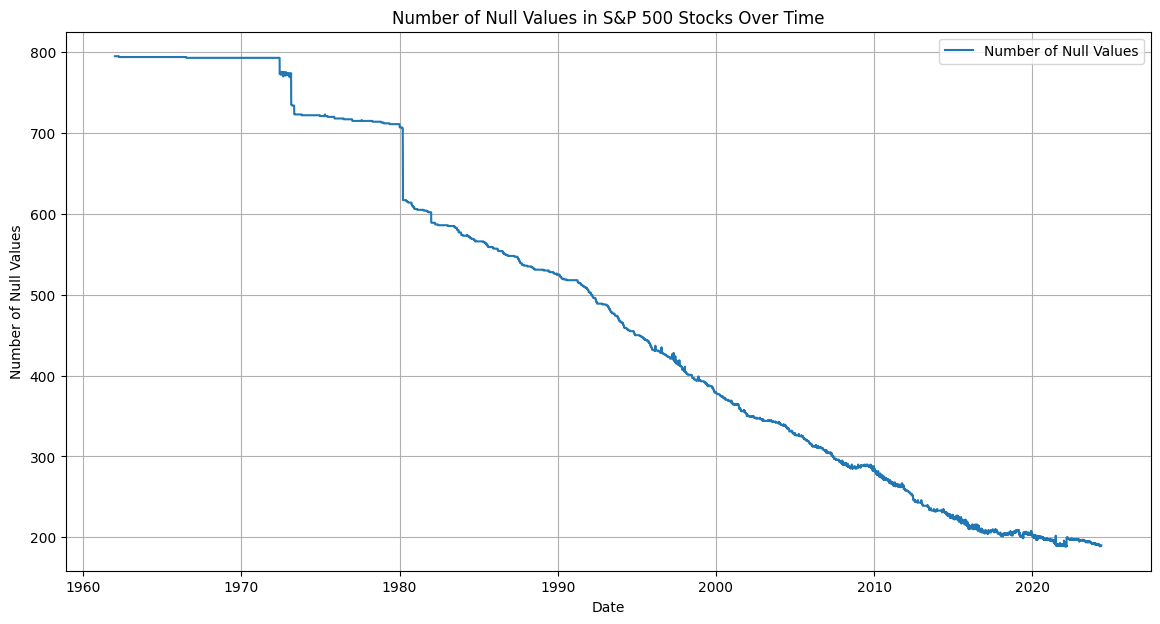

In [ ]:
# Count number of null values for each date
null_counts = tickers.isnull().sum(axis=1)

# Plot the number of null values over time
plt.figure(figsize=(14, 7))
plt.plot(null_counts, label='Number of Null Values')
plt.xlabel('Date')
plt.ylabel('Number of Null Values')
plt.title('Number of Null Values in S&P 500 Stocks Over Time')
plt.legend()
plt.grid(True)
plt.show()

### as we can see from above graph, the number of nulls for stocks is starting to decline at year 1980, therefore we will re-consider <b>1980</b> as the *start_date* for our dataset


In [ ]:
# retaining data only after date = '1980-05-15' due to lower null count

tickers = tickers.loc['1980-05-15':]

## Scraping SP500 Market Data (Close)

In [ ]:
snp500_price = yf.download('^GSPC', start='1980-05-15', end='2024-05-15', rounding = True)['Close']
snp500_price

[*********************100%%**********************]  1 of 1 completed


Date
1980-05-15     106.99
1980-05-16     107.35
1980-05-19     107.67
1980-05-20     107.62
1980-05-21     107.72
               ...   
2024-05-08    5187.67
2024-05-09    5214.08
2024-05-10    5222.68
2024-05-13    5221.42
2024-05-14    5246.68
Name: Close, Length: 11092, dtype: float64

# II- Data Cleaning

In [ ]:
# removing nulls and renaming column

new_tickers = tickers.unstack().reset_index().dropna()
new_tickers = new_tickers.rename(columns={0: 'Close'})
new_tickers

,Ticker,Date,Close
4932,A,1999-11-18,31.47
4933,A,1999-11-19,28.88
4934,A,1999-11-22,31.47
4935,A,1999-11-23,28.61
4936,A,1999-11-24,29.37
...,...,...,...
9128711,ZTS,2024-05-08,164.92
9128712,ZTS,2024-05-09,168.13
9128713,ZTS,2024-05-10,169.04
9128714,ZTS,2024-05-13,167.91


In [ ]:
new_snp500 = snp500_price.reset_index().dropna()

# rename first Column to 'S&P500'
new_snp500 = new_snp500.rename(columns={new_snp500.columns[1]: 'S&P500'})

new_snp500

,Date,S&P500
0,1980-05-15,106.99
1,1980-05-16,107.35
2,1980-05-19,107.67
3,1980-05-20,107.62
4,1980-05-21,107.72
...,...,...
11087,2024-05-08,5187.67
11088,2024-05-09,5214.08
11089,2024-05-10,5222.68
11090,2024-05-13,5221.42


## Calculate the weekly returns for the stocks

In [ ]:
# Calculate the weekly returns

weekly_stock_returns = (new_tickers.set_index('Date')
.groupby('Ticker')['Close']
.apply(lambda x: x.pct_change(periods=5).dropna())
.reset_index()
.set_index('Date')
.groupby('Ticker')
.resample('W')
.first()
.dropna()
.reset_index(level=0, drop=True))

weekly_stock_returns

,Ticker,Close
Date,,
1999-11-28,A,-0.063870
1999-12-05,A,0.043283
1999-12-12,A,0.086293
1999-12-19,A,-0.005500
1999-12-26,A,0.030108
...,...,...
2024-04-21,ZTS,-0.096083
2024-04-28,ZTS,-0.028243
2024-05-05,ZTS,0.097293


## Calculate the weekly returns for SP500 Market

In [ ]:
# Calculate the weekly returns

snp500_weekly_returns = (
    new_snp500.set_index('Date')['S&P500']
    .pct_change(periods=5).dropna()
    .resample('W').first())

# III- Data Munging

In [ ]:
# Convert to dataframe

snp500_weekly_returns = snp500_weekly_returns.to_frame()

## Merge both returns datasets in 1 dataset

In [ ]:
# Merge the two DataFrames on the 'Date' column

merged_df = pd.merge(weekly_stock_returns, snp500_weekly_returns, left_index=True, right_index=True, how='outer')

In [ ]:
merged_df = merged_df.reset_index()

# Sort the DataFrame by 'Ticker' and then by 'Date'
merged_df = merged_df.sort_values(by=['Ticker', 'Date'])

# Set 'Date' column back as the index
all_Returns = merged_df.set_index('Date')
all_Returns

,Ticker,Close,S&P500
Date,,,
1999-11-28,A,-0.063870,0.019041
1999-12-05,A,0.043283,-0.009965
1999-12-12,A,0.086293,0.011010
1999-12-19,A,-0.005500,-0.005698
1999-12-26,A,0.030108,0.002028
...,...,...,...
2024-04-21,ZTS,-0.096083,-0.027020
2024-04-28,ZTS,-0.028243,-0.010119
2024-05-05,ZTS,0.097293,0.021069


# III- Modeling

## Compute Beta & Alpha values using rolling regression

In [ ]:
# Define the rolling window size
window_size = 104

# Function to calculate rolling beta and alpha
def rolling_regression(group, window):
    if len(group) < window:
        group['beta'] = np.nan
        group['alpha'] = np.nan
        return group
    X = sm.add_constant(group['S&P500'])
    model = RollingOLS(group['Close'], X, window=window).fit()
    group['beta'] = model.params['S&P500']
    group['alpha'] = model.params['const']
    return group

# Group by Ticker and apply rolling regression
results_df = all_Returns.groupby('Ticker').apply(rolling_regression, window=window_size)

results_df = results_df.reset_index(level='Ticker', drop=True)
# Display the result
results_df

,Ticker,Close,S&P500,beta,alpha
Date,,,,,
1999-11-28,A,-0.063870,0.019041,NaN,NaN
1999-12-05,A,0.043283,-0.009965,NaN,NaN
1999-12-12,A,0.086293,0.011010,NaN,NaN
1999-12-19,A,-0.005500,-0.005698,NaN,NaN
1999-12-26,A,0.030108,0.002028,NaN,NaN
...,...,...,...,...,...
2024-04-21,ZTS,-0.096083,-0.027020,1.055856,-0.003452
2024-04-28,ZTS,-0.028243,-0.010119,1.063605,-0.003721
2024-05-05,ZTS,0.097293,0.021069,1.093648,-0.003096


In [ ]:
results_df.isnull().sum()

Ticker        0
Close         0
S&P500        0
beta      68953
alpha     68953
dtype: int64

In [ ]:
# dropping null values
results_df = results_df.dropna()

## Replacing infinite with NAN & drop all NAN

In [ ]:
# Check for positive and negative infinity values in the alpha column
inf_alpha = results_df['alpha'][np.isinf(results_df['alpha'])]
print("Rows with infinity values in 'alpha':\n", inf_alpha)

# Similarly, check for other columns if necessary
inf_beta = results_df['beta'][np.isinf(results_df['beta'])]
print("Rows with infinity values in 'beta':\n", inf_beta)

Rows with infinity values in 'alpha':
 Series([], Name: alpha, dtype: float64)
Rows with infinity values in 'beta':
 Series([], Name: beta, dtype: float64)


In [ ]:
# Replace inf values with NaN in specific columns
results_df['alpha'] = results_df['alpha'].replace([np.inf, -np.inf], np.nan)
results_df['beta'] = results_df['beta'].replace([np.inf, -np.inf], np.nan)

# # Drop rows where 'alpha' or 'beta' are NaN
results_df = results_df.dropna(subset=['alpha', 'beta'])

<ipython-input-22-272a2e0dc013>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['alpha'] = results_df['alpha'].replace([np.inf, -np.inf], np.nan)
<ipython-input-22-272a2e0dc013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['beta'] = results_df['beta'].replace([np.inf, -np.inf], np.nan)


# IV- Data Exploration & Data Analysis

## Annual Stats of beta & alpha


In [ ]:
# Resample to yearly frequency and calculate the first entry of each year
yearly_first_entries = results_df.groupby('Ticker').resample('Y').first().reset_index(level=0, drop=True)

alpha_stats_yearly = yearly_first_entries.groupby(yearly_first_entries.index.year)['alpha'].describe()
# Display the statistics
print("Alpha Statistics:\n")
alpha_stats_yearly

Alpha Statistics:



,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
1982,217.0,0.002379,0.004147,-0.006669,-0.000342,0.002107,0.004361,0.018532
1983,221.0,0.003149,0.004960,-0.015617,0.000644,0.003075,0.005184,0.029829
1984,237.0,0.002668,0.004593,-0.020571,0.000066,0.002437,0.004940,0.023183
1985,250.0,0.001118,0.004253,-0.014693,-0.001126,0.001209,0.003248,0.028720
1986,257.0,0.000799,0.004253,-0.013229,-0.001257,0.000979,0.002789,0.030137
1987,266.0,0.000878,0.004883,-0.018828,-0.001291,0.001458,0.003150,0.031311
1988,275.0,0.000560,0.004668,-0.014727,-0.001975,0.000547,0.002731,0.022146
1989,287.0,0.000783,0.003927,-0.013076,-0.001402,0.000327,0.002167,0.017028
1990,292.0,0.001199,0.003975,-0.008805,-0.001095,0.000788,0.002957,0.021270


In [ ]:
beta_stats_yearly = yearly_first_entries.groupby(yearly_first_entries.index.year)['beta'].describe()

# Display the statistics
print("Beta Statistics:\n")
beta_stats_yearly

Beta Statistics:



,count,mean,std,min,25%,50%,75%,max
Date,,,,,,,,
1982,217.0,0.830600,0.453255,0.000000,0.510530,0.737323,1.061529,2.377922
1983,221.0,0.826539,0.382361,0.000000,0.543433,0.801303,1.062137,2.207300
1984,237.0,0.819263,0.395779,0.000000,0.461555,0.848514,1.120750,1.860314
1985,250.0,0.918591,0.515492,-0.210093,0.544532,0.906208,1.214831,2.859962
1986,257.0,1.016292,0.526233,-0.253731,0.630928,0.981601,1.327477,2.641292
1987,266.0,0.948181,0.446913,-2.084359,0.712246,0.958813,1.251463,2.142535
1988,275.0,0.858015,0.340189,-0.590380,0.606059,0.895706,1.075856,1.811908
1989,287.0,0.841546,0.348864,-0.120442,0.579628,0.873068,1.083461,1.898756
1990,292.0,0.839102,0.403145,-0.426089,0.557185,0.874957,1.098241,2.000441


In [ ]:
# Reset index to make 'Date' and 'Ticker' regular columns
results_df = results_df.reset_index()

# Resample to yearly frequency and calculate the first entry of each year per ticker
yearly_first_entries = results_df.groupby('Ticker').resample('Y', on='Date').first().reset_index(level=0, drop=True)

# Extract the year from the 'Date' column
yearly_first_entries['Year'] = yearly_first_entries.index.year

# Group by 'Year' and calculate statistics
summary_table = yearly_first_entries.groupby('Year').agg({
    'Ticker': 'count',
    'beta': [lambda x: x.isnull().sum(), lambda x: x.notnull().sum(), lambda x: np.isinf(x).sum()],
    'alpha': [lambda x: x.isnull().sum(), lambda x: x.notnull().sum(), lambda x: np.isinf(x).sum()]
})

# Flatten the multi-level columns
summary_table.columns = ['Number of Stocks',
                         'Number of Null Betas', 'Number of Non-Null Betas', 'Number of Infinite Betas',
                         'Number of Null Alphas', 'Number of Non-Null Alphas', 'Number of Infinite Alphas']
# Display the summary table
print("Summary Statistics Per Year:\n")
summary_table

Summary Statistics Per Year:



,Number of Stocks,Number of Null Betas,Number of Non-Null Betas,Number of Infinite Betas,Number of Null Alphas,Number of Non-Null Alphas,Number of Infinite Alphas
Year,,,,,,,
1982,217,0,217,0,0,217,0
1983,221,0,221,0,0,221,0
1984,237,0,237,0,0,237,0
1985,250,0,250,0,0,250,0
1986,257,0,257,0,0,257,0
1987,266,0,266,0,0,266,0
1988,275,0,275,0,0,275,0
1989,287,0,287,0,0,287,0
1990,292,0,292,0,0,292,0


## Annual Mean of Betas for All Stocks

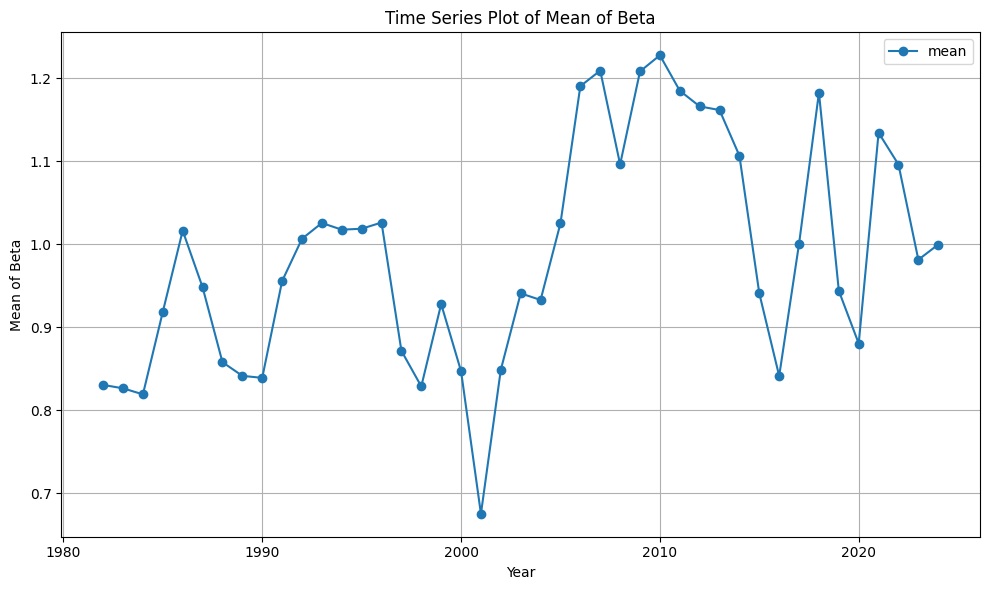

In [ ]:
# Extract the mean values for beta
mean_beta = beta_stats_yearly.loc[:, ('mean')]

# Plot the time series graph
mean_beta.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Time Series Plot of Mean of Beta')
plt.xlabel('Year')
plt.ylabel('Mean of Beta')
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Beta and Alpha & Deciles

In [ ]:
selected_columns = results_df[['Date', 'Ticker', 'beta', 'alpha']].copy()

# Apply qcut by grouping on 'Ticker' and transforming 'beta' column
selected_columns['beta_decile'] = selected_columns.groupby('Date')['beta'].transform(
                        lambda x: pd.qcut(x, 10, labels=False, duplicates='drop') + 1
                    )

selected_columns['alpha_decile'] = selected_columns.groupby('Date')['alpha'].transform(
                        lambda x: pd.qcut(x, 10, labels=False, duplicates='drop') + 1
                    )
deciles_df = selected_columns
deciles_df

,Date,Ticker,beta,alpha,beta_decile,alpha_decile
0,2001-11-18,A,2.524299,0.005560,10,7
1,2001-11-25,A,2.520038,0.005825,10,7
2,2001-12-02,A,2.536866,0.005642,10,7
3,2001-12-09,A,2.497970,0.006047,10,7
4,2001-12-16,A,2.506624,0.006615,10,7
...,...,...,...,...,...,...
965166,2024-04-21,ZTS,1.055856,-0.003452,6,3
965167,2024-04-28,ZTS,1.063605,-0.003721,6,2
965168,2024-05-05,ZTS,1.093648,-0.003096,6,3
965169,2024-05-12,ZTS,1.078494,-0.002522,6,4


## beta/alpha 3M returns using .shift()

In [ ]:
# sort by 'Ticker' and 'Date'
results_df = results_df.sort_values(by=['Ticker', 'Date'])

# Copy necessary columns
monthly_beta_alpha_returns = results_df[['Date', 'Ticker', 'beta', 'alpha']].copy()

# shift the beta column by 3M
monthly_beta_alpha_returns['3_month_beta'] = monthly_beta_alpha_returns.groupby('Ticker')['beta'].shift(-13)

#shift the alpha column by 3M
monthly_beta_alpha_returns['3_month_alpha'] = monthly_beta_alpha_returns.groupby('Ticker')['alpha'].shift(-13)

## SP500 market return in 3M

In [ ]:
# sp500 3M return
new_snp500['Date'] = pd.to_datetime(new_snp500['Date'])

weekly_3M_returnSP500 = (
    new_snp500.set_index('Date')
    .pct_change(periods=63).dropna()
    .shift(-63)
    .resample('W').first()
)

In [ ]:
# Reset index to merge later
weekly_3M_returnSP500.reset_index(inplace=True)

# Merge the DataFrames on the 'Date' column
monthly_beta_alpha_returns = pd.merge(monthly_beta_alpha_returns, weekly_3M_returnSP500, on='Date', how='left')

# Rename the column to 3_month_SP500
monthly_beta_alpha_returns.rename(columns={'S&P500': '3_month_SP500'}, inplace=True)

In [ ]:
# Compute positive/negative indicator for S&P500 return in 3M
monthly_beta_alpha_returns['Pos/Neg_Indicator'] = monthly_beta_alpha_returns['3_month_SP500'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

In [ ]:
# Merge the DataFrames on 'Date' and 'Ticker'
merged_df = pd.merge(monthly_beta_alpha_returns, deciles_df[['Date', 'Ticker', 'beta_decile', 'alpha_decile']], on=['Date', 'Ticker'], how='left')
merged_df

,Date,Ticker,beta,alpha,3_month_beta,3_month_alpha,3_month_SP500,Pos/Neg_Indicator,beta_decile,alpha_decile
0,2001-11-18,A,2.524299,0.005560,2.471618,-0.000764,0.000161,Positive,10,7
1,2001-11-25,A,2.520038,0.005825,2.549805,-0.002794,-0.060909,Negative,10,7
2,2001-12-02,A,2.536866,0.005642,2.550393,-0.003095,-0.041065,Negative,10,7
3,2001-12-09,A,2.497970,0.006047,2.385217,-0.007130,0.029091,Positive,10,7
4,2001-12-16,A,2.506624,0.006615,2.379686,-0.005532,0.012422,Positive,10,7
...,...,...,...,...,...,...,...,...,...,...
965166,2024-04-21,ZTS,1.055856,-0.003452,NaN,NaN,NaN,Negative,6,3
965167,2024-04-28,ZTS,1.063605,-0.003721,NaN,NaN,NaN,Negative,6,2
965168,2024-05-05,ZTS,1.093648,-0.003096,NaN,NaN,NaN,Negative,6,3
965169,2024-05-12,ZTS,1.078494,-0.002522,NaN,NaN,NaN,Negative,6,4


In [ ]:
# Creating diff beta and diff alpha columns

merged_df['diff_beta'] = merged_df['3_month_beta'] - merged_df['beta']
merged_df['diff_alpha'] = merged_df['3_month_alpha'] - merged_df['alpha']
merged_df

,Date,Ticker,beta,alpha,3_month_beta,3_month_alpha,3_month_SP500,Pos/Neg_Indicator,beta_decile,alpha_decile,diff_beta,diff_alpha
0,2001-11-18,A,2.524299,0.005560,2.471618,-0.000764,0.000161,Positive,10,7,-0.052681,-0.006324
1,2001-11-25,A,2.520038,0.005825,2.549805,-0.002794,-0.060909,Negative,10,7,0.029767,-0.008619
2,2001-12-02,A,2.536866,0.005642,2.550393,-0.003095,-0.041065,Negative,10,7,0.013528,-0.008736
3,2001-12-09,A,2.497970,0.006047,2.385217,-0.007130,0.029091,Positive,10,7,-0.112753,-0.013177
4,2001-12-16,A,2.506624,0.006615,2.379686,-0.005532,0.012422,Positive,10,7,-0.126938,-0.012147
...,...,...,...,...,...,...,...,...,...,...,...,...
965166,2024-04-21,ZTS,1.055856,-0.003452,NaN,NaN,NaN,Negative,6,3,NaN,NaN
965167,2024-04-28,ZTS,1.063605,-0.003721,NaN,NaN,NaN,Negative,6,2,NaN,NaN
965168,2024-05-05,ZTS,1.093648,-0.003096,NaN,NaN,NaN,Negative,6,3,NaN,NaN
965169,2024-05-12,ZTS,1.078494,-0.002522,NaN,NaN,NaN,Negative,6,4,NaN,NaN


# V- Final Visualization Analysis

## HeatMaps

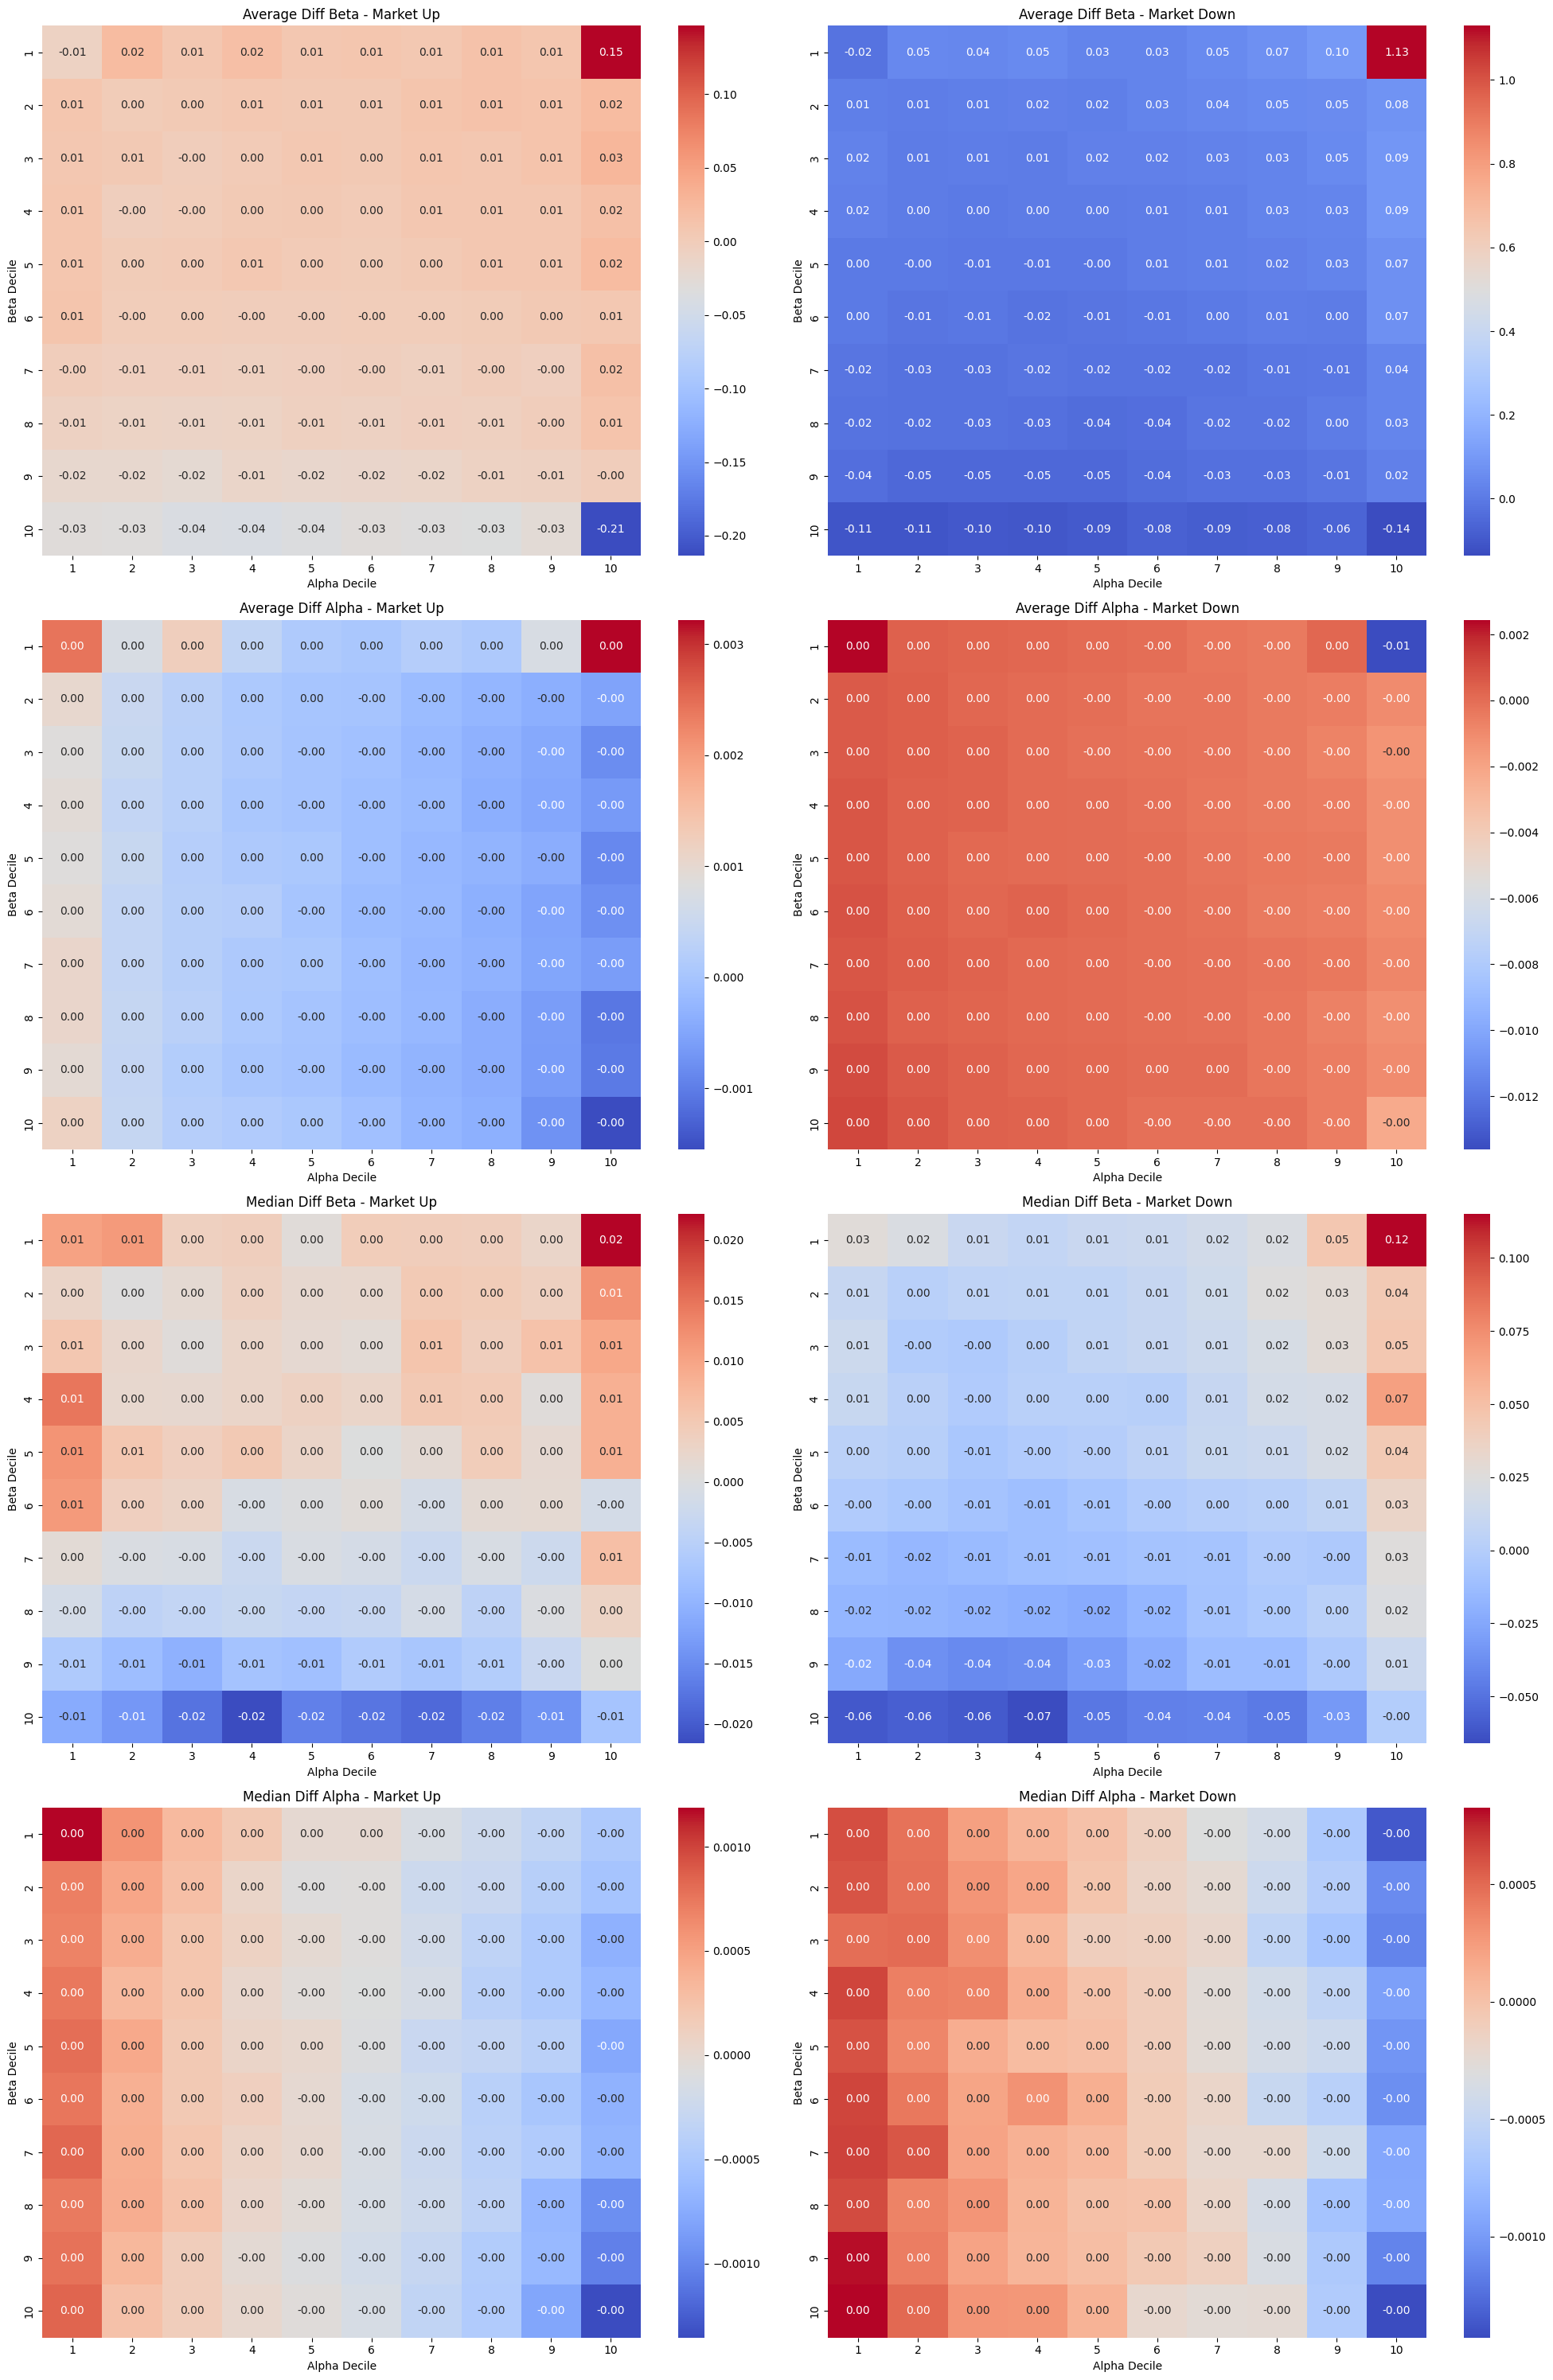

In [ ]:
# Filter data for market up and market down conditions
market_up = merged_df[merged_df['Pos/Neg_Indicator'] == 'Positive']
market_down = merged_df[merged_df['Pos/Neg_Indicator'] == 'Negative']

# Group by the specified columns and compute the mean and median of diff_beta and diff_alpha
grouped_up = market_up.groupby(['beta_decile', 'alpha_decile']).agg(
    avg_diff_beta=('diff_beta', 'mean'),
    median_diff_beta=('diff_beta', 'median'),
    avg_diff_alpha=('diff_alpha', 'mean'),
    median_diff_alpha=('diff_alpha', 'median')
).reset_index()

grouped_down = market_down.groupby(['beta_decile', 'alpha_decile']).agg(
    avg_diff_beta=('diff_beta', 'mean'),
    median_diff_beta=('diff_beta', 'median'),
    avg_diff_alpha=('diff_alpha', 'mean'),
    median_diff_alpha=('diff_alpha', 'median')
).reset_index()

# Pivot the data to create matrices for heatmaps
beta_diff_up_avg = grouped_up.pivot_table(values='avg_diff_beta', index='beta_decile', columns='alpha_decile')
beta_diff_down_avg = grouped_down.pivot_table(values='avg_diff_beta', index='beta_decile', columns='alpha_decile')
alpha_diff_up_avg = grouped_up.pivot_table(values='avg_diff_alpha', index='beta_decile', columns='alpha_decile')
alpha_diff_down_avg = grouped_down.pivot_table(values='avg_diff_alpha', index='beta_decile', columns='alpha_decile')

beta_diff_up_median = grouped_up.pivot_table(values='median_diff_beta', index='beta_decile', columns='alpha_decile')
beta_diff_down_median = grouped_down.pivot_table(values='median_diff_beta', index='beta_decile', columns='alpha_decile')
alpha_diff_up_median = grouped_up.pivot_table(values='median_diff_alpha', index='beta_decile', columns='alpha_decile')
alpha_diff_down_median = grouped_down.pivot_table(values='median_diff_alpha', index='beta_decile', columns='alpha_decile')

# Plot the heatmaps
fig, axs = plt.subplots(4, 2, figsize=(20, 30))

# Heatmap for avg_diff_beta when market is up
sns.heatmap(beta_diff_up_avg, ax=axs[0, 0], cmap='coolwarm', annot=True, fmt=".2f")
axs[0, 0].set_title('Average Diff Beta - Market Up')
axs[0, 0].set_xlabel('Alpha Decile')
axs[0, 0].set_ylabel('Beta Decile')

# Heatmap for avg_diff_beta when market is down
sns.heatmap(beta_diff_down_avg, ax=axs[0, 1], cmap='coolwarm', annot=True, fmt=".2f")
axs[0, 1].set_title('Average Diff Beta - Market Down')
axs[0, 1].set_xlabel('Alpha Decile')
axs[0, 1].set_ylabel('Beta Decile')

# Heatmap for avg_diff_alpha when market is up
sns.heatmap(alpha_diff_up_avg, ax=axs[1, 0], cmap='coolwarm', annot=True, fmt=".2f")
axs[1, 0].set_title('Average Diff Alpha - Market Up')
axs[1, 0].set_xlabel('Alpha Decile')
axs[1, 0].set_ylabel('Beta Decile')

# Heatmap for avg_diff_alpha when market is down
sns.heatmap(alpha_diff_down_avg, ax=axs[1, 1], cmap='coolwarm', annot=True, fmt=".2f")
axs[1, 1].set_title('Average Diff Alpha - Market Down')
axs[1, 1].set_xlabel('Alpha Decile')
axs[1, 1].set_ylabel('Beta Decile')

# Heatmap for median_diff_beta when market is up
sns.heatmap(beta_diff_up_median, ax=axs[2, 0], cmap='coolwarm', annot=True, fmt=".2f")
axs[2, 0].set_title('Median Diff Beta - Market Up')
axs[2, 0].set_xlabel('Alpha Decile')
axs[2, 0].set_ylabel('Beta Decile')

# Heatmap for median_diff_beta when market is down
sns.heatmap(beta_diff_down_median, ax=axs[2, 1], cmap='coolwarm', annot=True, fmt=".2f")
axs[2, 1].set_title('Median Diff Beta - Market Down')
axs[2, 1].set_xlabel('Alpha Decile')
axs[2, 1].set_ylabel('Beta Decile')

# Heatmap for median_diff_alpha when market is up
sns.heatmap(alpha_diff_up_median, ax=axs[3, 0], cmap='coolwarm', annot=True, fmt=".2f")
axs[3, 0].set_title('Median Diff Alpha - Market Up')
axs[3, 0].set_xlabel('Alpha Decile')
axs[3, 0].set_ylabel('Beta Decile')

# Heatmap for median_diff_alpha when market is down
sns.heatmap(alpha_diff_down_median, ax=axs[3, 1], cmap='coolwarm', annot=True, fmt=".2f")
axs[3, 1].set_title('Median Diff Alpha - Market Down')
axs[3, 1].set_xlabel('Alpha Decile')
axs[3, 1].set_ylabel('Beta Decile')

plt.tight_layout()
plt.show()

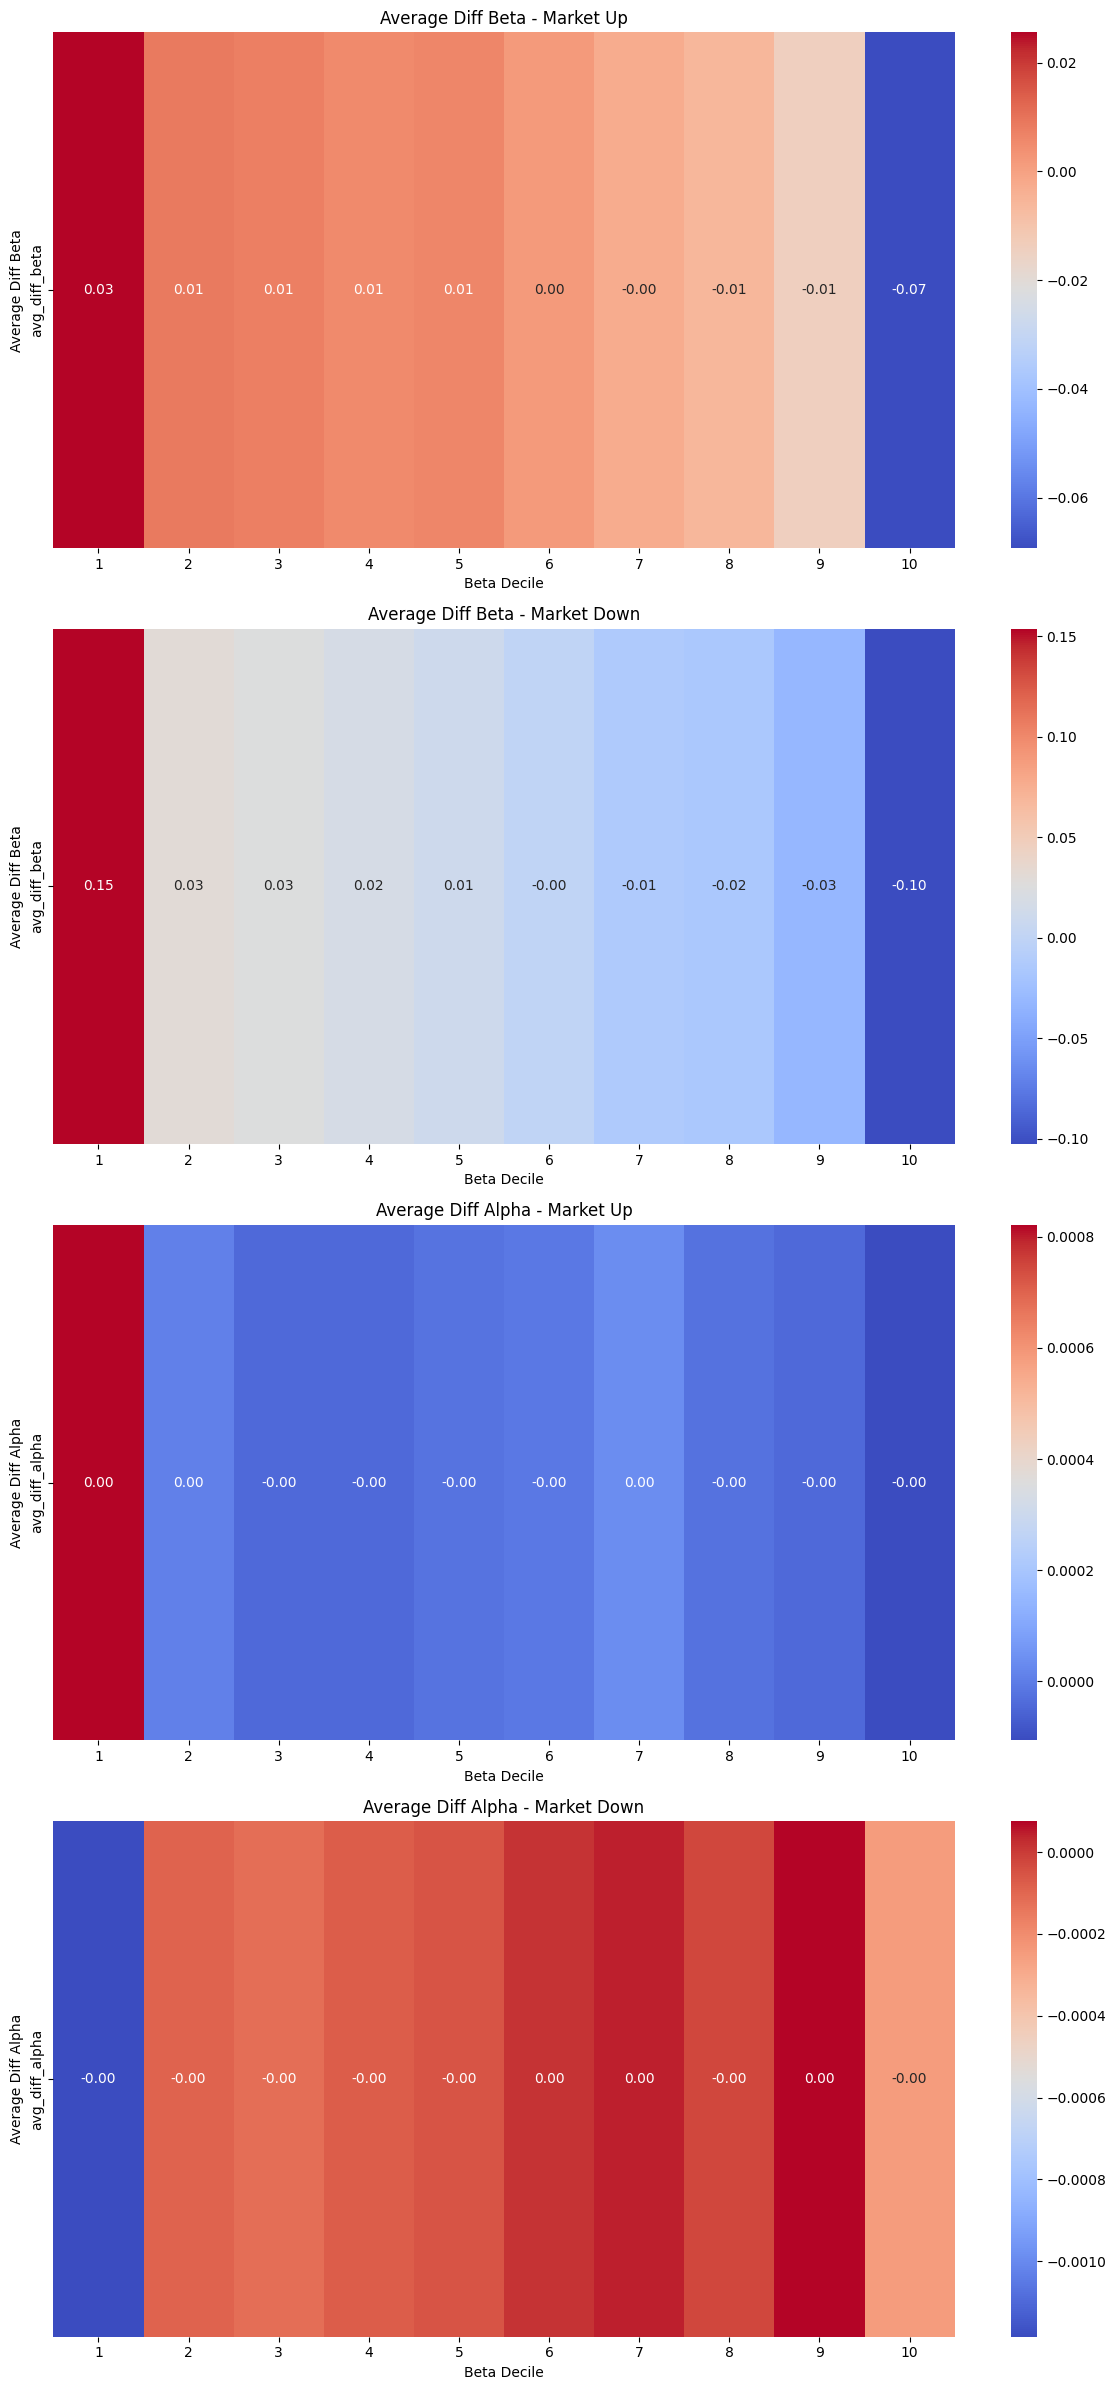

In [ ]:
# Assuming merged_df is already defined and contains the necessary columns

# Filter data for market up and market down conditions
market_up = merged_df[merged_df['Pos/Neg_Indicator'] == 'Positive']
market_down = merged_df[merged_df['Pos/Neg_Indicator'] == 'Negative']

# Group by beta_decile and compute the mean and median of diff_beta and diff_alpha
grouped_up = market_up.groupby('beta_decile').agg(
    avg_diff_beta=('diff_beta', 'mean'),
    median_diff_beta=('diff_beta', 'median'),
    avg_diff_alpha=('diff_alpha', 'mean'),
    median_diff_alpha=('diff_alpha', 'median')
).reset_index()

grouped_down = market_down.groupby('beta_decile').agg(
    avg_diff_beta=('diff_beta', 'mean'),
    median_diff_beta=('diff_beta', 'median'),
    avg_diff_alpha=('diff_alpha', 'mean'),
    median_diff_alpha=('diff_alpha', 'median')
).reset_index()

# Set up the figure
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

# Plot for avg_diff_beta when market is up
sns.heatmap(grouped_up[['beta_decile', 'avg_diff_beta']].set_index('beta_decile').T, ax=axs[0], cmap='coolwarm', annot=True, fmt=".2f")
axs[0].set_title('Average Diff Beta - Market Up')
axs[0].set_xlabel('Beta Decile')
axs[0].set_ylabel('Average Diff Beta')

# Plot for avg_diff_beta when market is down
sns.heatmap(grouped_down[['beta_decile', 'avg_diff_beta']].set_index('beta_decile').T, ax=axs[1], cmap='coolwarm', annot=True, fmt=".2f")
axs[1].set_title('Average Diff Beta - Market Down')
axs[1].set_xlabel('Beta Decile')
axs[1].set_ylabel('Average Diff Beta')

# Plot for avg_diff_alpha when market is up
sns.heatmap(grouped_up[['beta_decile', 'avg_diff_alpha']].set_index('beta_decile').T, ax=axs[2], cmap='coolwarm', annot=True, fmt=".2f")
axs[2].set_title('Average Diff Alpha - Market Up')
axs[2].set_xlabel('Beta Decile')
axs[2].set_ylabel('Average Diff Alpha')

# Plot for avg_diff_alpha when market is down
sns.heatmap(grouped_down[['beta_decile', 'avg_diff_alpha']].set_index('beta_decile').T, ax=axs[3], cmap='coolwarm', annot=True, fmt=".2f")
axs[3].set_title('Average Diff Alpha - Market Down')
axs[3].set_xlabel('Beta Decile')
axs[3].set_ylabel('Average Diff Alpha')

plt.tight_layout()
plt.show()


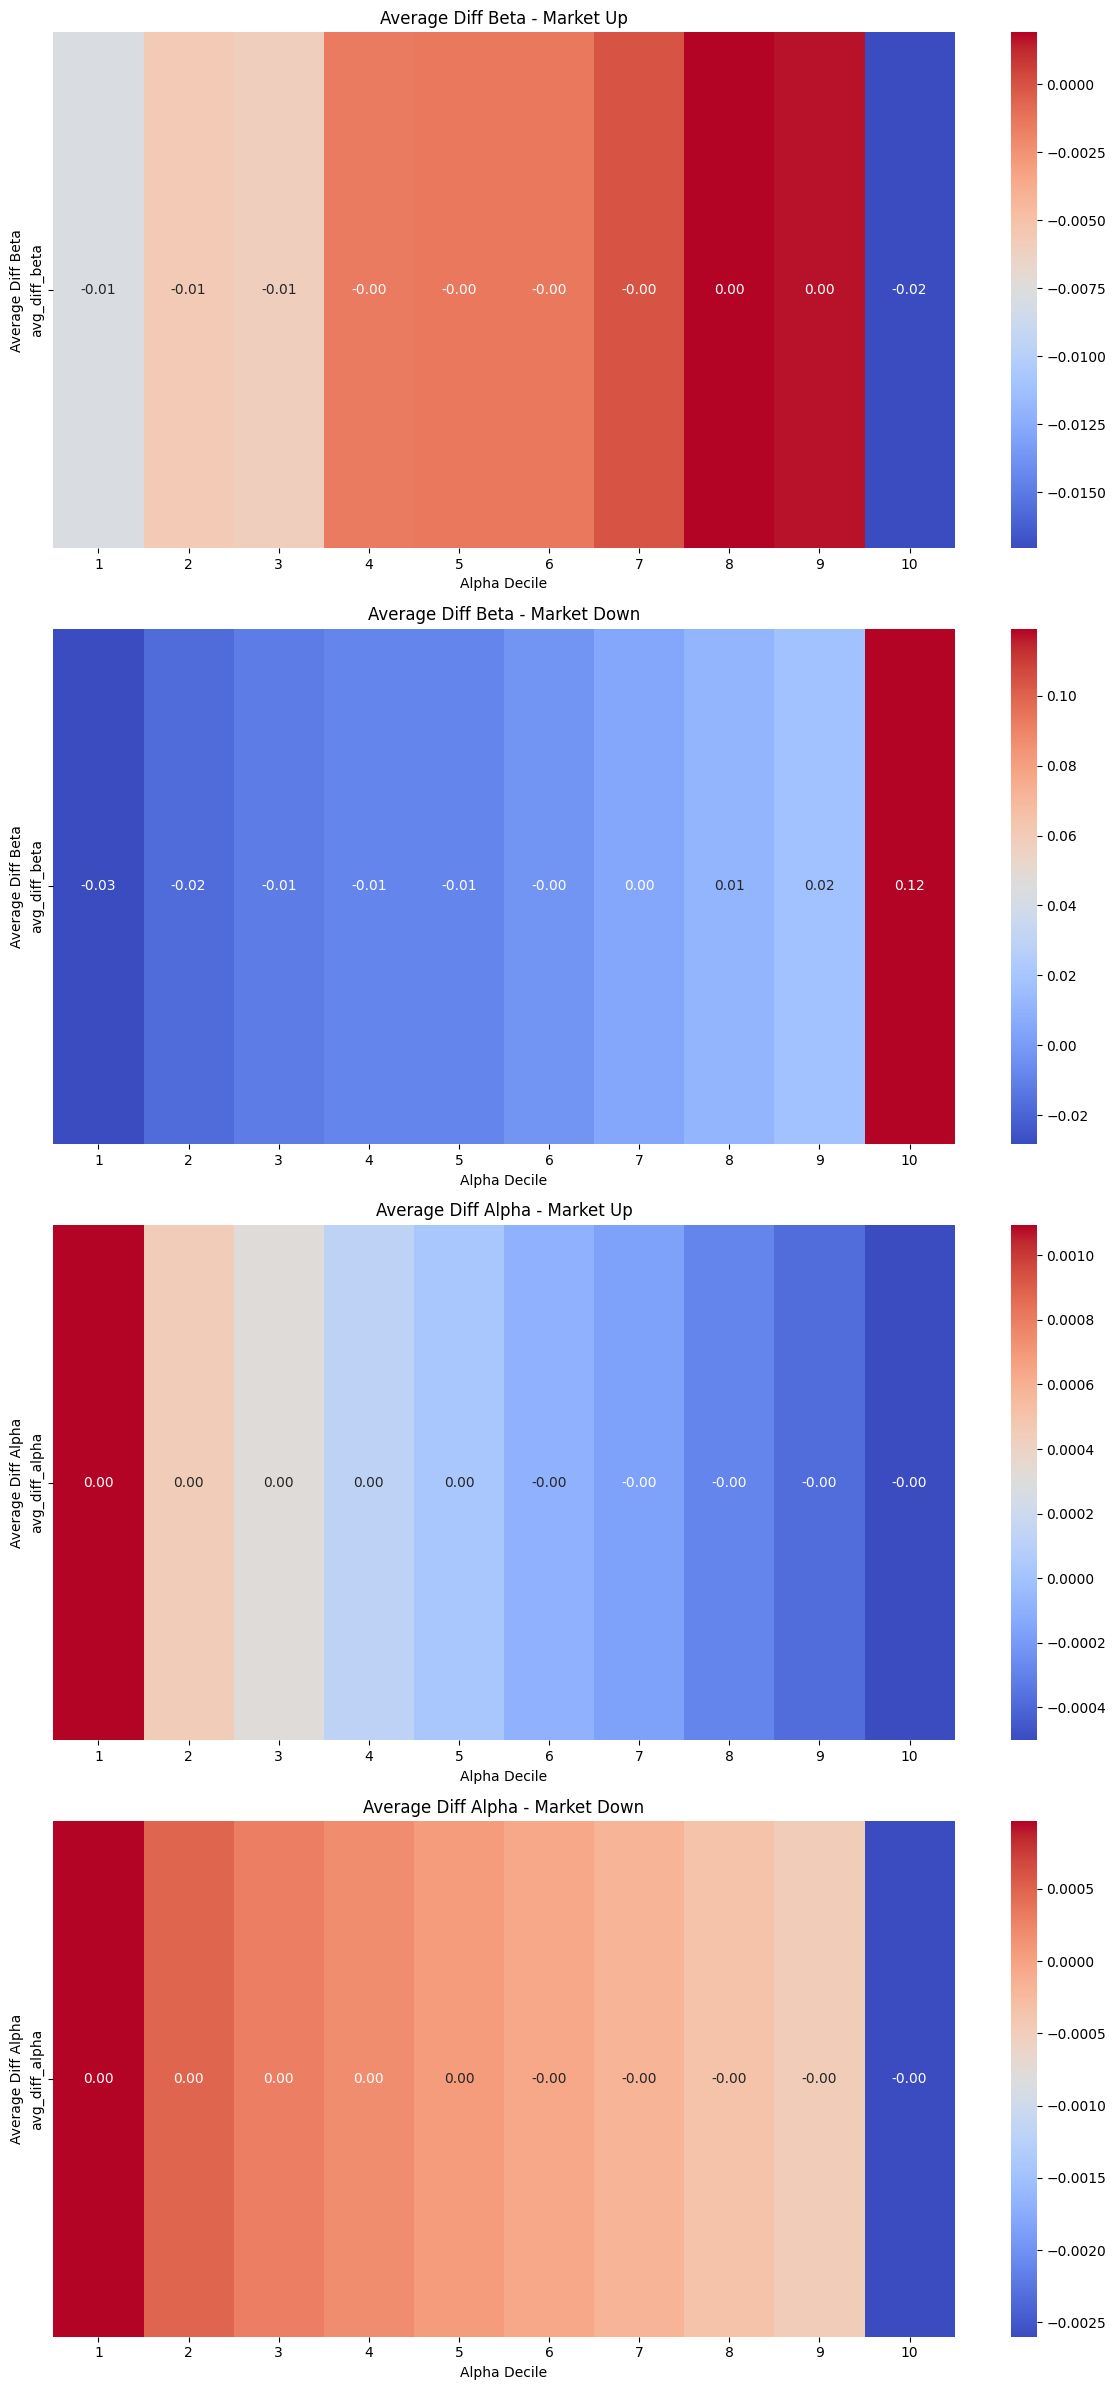

In [ ]:
# Assuming merged_df is already defined and contains the necessary columns

# Filter data for market up and market down conditions
market_up = merged_df[merged_df['Pos/Neg_Indicator'] == 'Positive']
market_down = merged_df[merged_df['Pos/Neg_Indicator'] == 'Negative']

# Group by alpha_decile and compute the mean and median of diff_beta and diff_alpha
grouped_up = market_up.groupby('alpha_decile').agg(
    avg_diff_beta=('diff_beta', 'mean'),
    median_diff_beta=('diff_beta', 'median'),
    avg_diff_alpha=('diff_alpha', 'mean'),
    median_diff_alpha=('diff_alpha', 'median')
).reset_index()

grouped_down = market_down.groupby('alpha_decile').agg(
    avg_diff_beta=('diff_beta', 'mean'),
    median_diff_beta=('diff_beta', 'median'),
    avg_diff_alpha=('diff_alpha', 'mean'),
    median_diff_alpha=('diff_alpha', 'median')
).reset_index()

# Set up the figure
fig, axs = plt.subplots(4, 1, figsize=(12, 24))

# Plot for avg_diff_beta when market is up
sns.heatmap(grouped_up[['alpha_decile', 'avg_diff_beta']].set_index('alpha_decile').T, ax=axs[0], cmap='coolwarm', annot=True, fmt=".2f")
axs[0].set_title('Average Diff Beta - Market Up')
axs[0].set_xlabel('Alpha Decile')
axs[0].set_ylabel('Average Diff Beta')

# Plot for avg_diff_beta when market is down
sns.heatmap(grouped_down[['alpha_decile', 'avg_diff_beta']].set_index('alpha_decile').T, ax=axs[1], cmap='coolwarm', annot=True, fmt=".2f")
axs[1].set_title('Average Diff Beta - Market Down')
axs[1].set_xlabel('Alpha Decile')
axs[1].set_ylabel('Average Diff Beta')

# Plot for avg_diff_alpha when market is up
sns.heatmap(grouped_up[['alpha_decile', 'avg_diff_alpha']].set_index('alpha_decile').T, ax=axs[2], cmap='coolwarm', annot=True, fmt=".2f")
axs[2].set_title('Average Diff Alpha - Market Up')
axs[2].set_xlabel('Alpha Decile')
axs[2].set_ylabel('Average Diff Alpha')

# Plot for avg_diff_alpha when market is down
sns.heatmap(grouped_down[['alpha_decile', 'avg_diff_alpha']].set_index('alpha_decile').T, ax=axs[3], cmap='coolwarm', annot=True, fmt=".2f")
axs[3].set_title('Average Diff Alpha - Market Down')
axs[3].set_xlabel('Alpha Decile')
axs[3].set_ylabel('Average Diff Alpha')

plt.tight_layout()
plt.show()
